In [ ]:

from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import pandas as pd                     
import matplotlib.pyplot as plt        
import numpy as np
import seaborn as sns

In [ ]:
fields = ['created_at', 'full_text']
tweets_df =pd.read_csv("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/Trump.csv", usecols= fields) #read only certain columns


In [ ]:
tweets_df.head(5)

,created_at,full_text
0,Sat Jun 13 12:24:25 +0000 2020,MAKE AMERICA GREAT AGAIN!
1,Sat Jun 13 12:23:47 +0000 2020,LAW &amp; ORDER!
2,Sat Jun 13 11:57:06 +0000 2020,10:00 A.M. https://t.co/TGUVzlT0My
3,Sat Jun 13 11:54:34 +0000 2020,RT @NickAdamsinUSA: America can NEVER become a...
4,Sat Jun 13 11:53:35 +0000 2020,So true! https://t.co/CSjsY2v3ex


In [ ]:

tweets_df['full_text'] = tweets_df['full_text'].str.replace(r'rt?,amp?,https?:\/\/.*[\r\n]*'," ")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(tweets_df['full_text'])

In [ ]:
count_vector.shape


(801, 3573)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,00,000,08,10,100,1000,100m,10am,10k,11,12,1200,13,141,14th,154,159,180,187,18m,19,1944,1994,19th,1st,200,2016,2017,2020,2021,20th,21,219,223,23,230,230pm,23rd,25,28,...,would,wouldn,wow,wp,wray,wreath,write,writer,writing,wrong,wrongdoing,wrote,wsj,wsjopinion,wth,wv02,wv03,year,years,yes,yesterday,yet,york,you,young,youngdems4trump,your,yours,yourself,youtube,yoyoel,ypsila,zero,zinc,zones,zoom_us,zuckerberg,zurich,𝗳𝗶𝘃𝗲,𝗺𝗶𝗹𝗹𝗶𝗼𝗻
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import spacy

In [ ]:
!python -m spacy download en_core_web_sm #Install english version of spacy

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:

nlp = spacy.load('en_core_web_sm')

In [ ]:
list(nlp.Defaults.stop_words)

['whence',
 'see',
 '‘s',
 'meanwhile',
 'together',
 'namely',
 'above',
 'beforehand',
 'eight',
 'formerly',
 'am',
 'indeed',
 'these',
 'your',
 'doing',
 'again',
 'hundred',
 'cannot',
 'side',
 'towards',
 'under',
 'anyhow',
 'each',
 'whoever',
 'not',
 'few',
 'others',
 'almost',
 'did',
 'afterwards',
 'being',
 'besides',
 'due',
 'more',
 'give',
 'wherein',
 'without',
 'yourselves',
 'behind',
 'is',
 'those',
 'someone',
 '’ve',
 'sometimes',
 'part',
 '’d',
 'per',
 'less',
 'always',
 'thereupon',
 'before',
 'become',
 'it',
 'thereafter',
 'well',
 'who',
 'fifteen',
 'are',
 'never',
 'been',
 'serious',
 'ten',
 'next',
 'will',
 'mostly',
 'anywhere',
 'keep',
 '‘ve',
 'whereas',
 'further',
 'may',
 'nine',
 'she',
 'than',
 'until',
 'us',
 '’ll',
 'first',
 'nor',
 'none',
 'no',
 'hence',
 'put',
 'somehow',
 '‘d',
 'nobody',
 'throughout',
 'former',
 'must',
 'here',
 'they',
 'neither',
 'via',
 'beside',
 'eleven',
 'however',
 'full',
 'during',
 'made

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(tweets_df['full_text'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,act,administration,amendment,america,american,americans,amp,anarchists,antifa,bad,best,better,biden,big,bill,black,book,border,bucksexton,businesses,charliekirk11,china,church,cities,city,cnn,come,coming,complete,congratulations,congressman,coronavirus,country,crime,david,day,defund,democrat,democrats,didn,...,sleepy,small,spacex,st,state,states,strong,suppo,taxes,teamtrump,thank,think,time,today,total,tremendous,true,trump,truth,twitter,united,usdot,vets,vote,want,washington,watch,way,week,white,whitehouse,win,women,work,working,world,year,years,yesterday,york
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(tweets_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['-PRON-', 'regard', 'use'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,\n \n,-PRON-,...,....,@bucksexton,@charliekirk11,@donaldjtrumpjr,@greggjarrett,@realdonaldtrump,@senronjohnson,@sentomcotton,@spacex,@teamtrump,@whitehouse,abuse,act,administration,amendment,america,american,americans,anarchist,antifa,arrest,bad,biden,big,bill,black,book,border,bring,business,change,china,church,city,cnn,come,commit,...,small,stand,state,stop,strong,suppo,taxis,tell,terrorist,thank,thing,think,time,today,total,tough,tremendous,true,trump,truth,twitter,u.s,united,use,vet,vote,walk,want,washington,watch,way,week,white,win,woman,work,world,year,yesterday,york
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(tweets_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,america,american,amp,biden,big,complete,great,joe,law,military,national,people,police,president,realdonaldtrump,rt,thank,today,total,trump
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) 
count_vector = cv.fit_transform(tweets_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,amp order,complete total,fake news,joe biden,law amp,law enforcement,military vets,national guard,president realdonaldtrump,radical left,rt donaldjtrumpjr,rt realdonaldtrump,rt senronjohnson,rt sentomcotton,rt teamtrump,rt whitehouse,second amendment,sleepy joe,teamtrump president,total endorsement
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False)

president realdonaldtrump    36
total endorsement            31
rt whitehouse                30
rt realdonaldtrump           27
complete total               27
national guard               25
joe biden                    23
radical left                 21
rt teamtrump                 18
law amp                      18
amp order                    17
sleepy joe                   15
military vets                14
second amendment             14
fake news                    13
rt senronjohnson             12
rt donaldjtrumpjr            12
teamtrump president          12
rt sentomcotton              12
law enforcement              12
dtype: int64

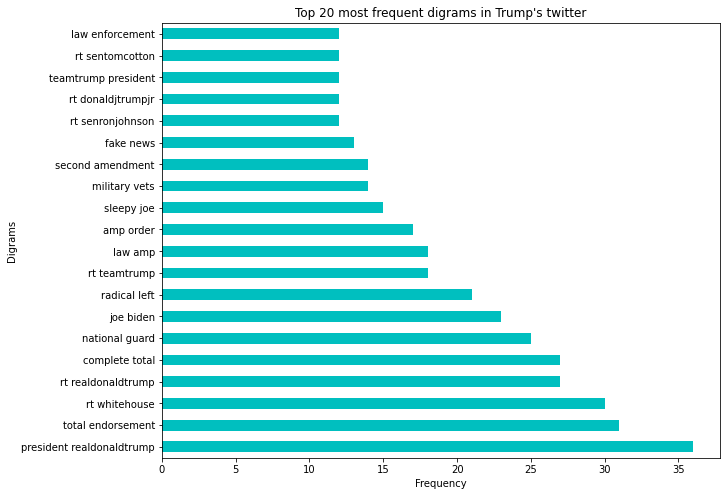

In [ ]:

results.sum(axis =0).sort_values(ascending = False).plot(kind= 'barh', figsize= (10,8), color= 'c')
plt.xlabel('Frequency')
plt.ylabel('Digrams')
plt.title("Top 20 most frequent digrams in Trump's twitter") # 20 most frequent digrams in Trumps twitter
plt.savefig("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/Digrams_trump.png",transparent= True,bbox_inches= 'tight')

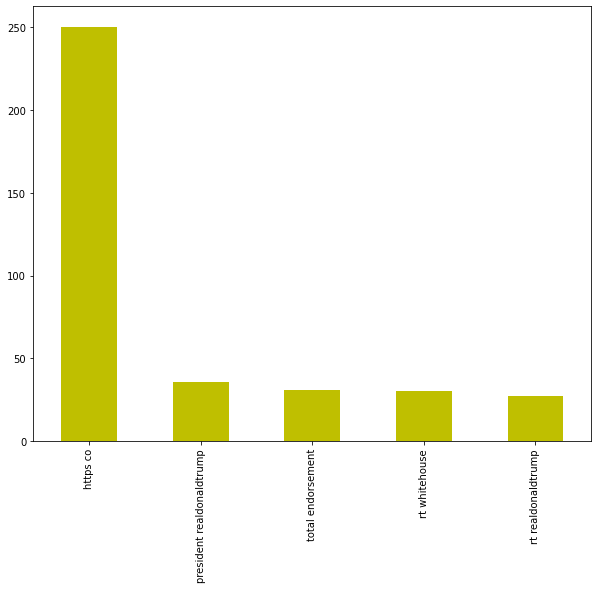

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head().plot(kind= 'bar', figsize= (10,8), color= 'y')# Top 5 most frequent words
plt.savefig("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/top_5_words.png",transparent= True,bbox_inches= 'tight')

In [ ]:

cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['george floyd', 'death','police']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(tweets_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,george floyd,death,police
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:

tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(tweets_df['full_text'])  #finds the tfidf score with normalization

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:

tweets_df = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

,george floyd,death,police
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.         0.         0.38691296 0.         0.18103945
  0.         0.         0.         0.17935851 0.         0.
  0.         0.         0.         0.         0.         0.19988207
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.36597531 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.27274807 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.21367095 0.         0.         0.20137953 0.         0.
  0.         0.         0.2196878  0.         0.19711892 0.
  0.         0.         0.         0.27084853 0.07710714 0.43488787
  0.07918175 0.         0.12088838 0.14136029 0.11347463 0.
  0.         0.11866955 0.         0.         0.16914901 

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.14182535 0.10181706 0.        ]
 ...
 [0.         0.         0.14182535 ... 1.         0.23497806 0.02219504]
 [0.         0.         0.10181706 ... 0.23497806 1.         0.        ]
 [0.         0.         0.         ... 0.02219504 0.         1.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

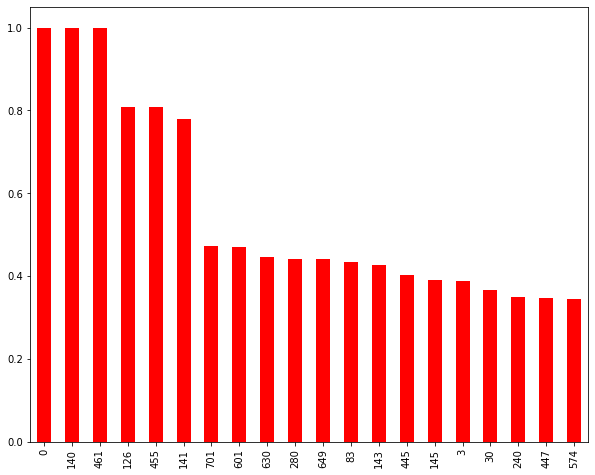

In [ ]:
pd.DataFrame(arr).loc[0].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize= (10,8), color='r')
plt.savefig("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/cosine_similarity_trump.png",transparent= True,bbox_inches= 'tight')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pandas as pd


In [ ]:
short_tweets =pd.read_csv("/gdrive/My Drive/Colab Notebooks/FINAL ESSAY/Trump.csv")

In [ ]:
short_tweets['full_text'].loc[0]

'MAKE AMERICA GREAT AGAIN!'

In [ ]:
short_tweets['full_text'].loc[701]

'RT @TeamTrump: President @realDonaldTrump: “In the years ahead, America will go bigger, bolder, further, faster, and America will go first.…'

In [ ]:
short_tweets['full_text'].loc[649]

'Great! https://t.co/mzKWU72bkb'

In [ ]:
short_tweets['full_text'].loc[630]

'RT @ErinMPerrine: No. No he isn’t.\n\nHe is protecting Americans. He is protecting America.\n\nPresident @realDonaldTrump is putting America fi…'

In [ ]:
short_tweets['full_text'].loc[601]

'Republicans, get out and vote today for those great candidates that will lead to big victories on November 3rd. MAKE AMERICA GREAT AGAIN!'

In [ ]:
short_tweets['full_text'].loc[574]

'RT @RandPaul: I joined @charliekirk11 on his podcast to discuss why there is a need to safely reopen America! Tune in! https://t.co/qA0djmk…'